In [2]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
# We are importing it because MNIST is a dataset which consists of a lot of handWritten digits

In [3]:
(train_img,train_labels),(test_img,test_labels) = tf.keras.datasets.mnist.load_data()
print(np.shape(train_img[0]))

(28, 28)


In [4]:
# Adding a grayscale layer to image
# to scale all values between 0 and 1 to fit in neural network
train_img =train_img.reshape((60000,28,28,1)).astype('float32')/255
test_img = test_img.reshape((10000,28,28,1)).astype('float32')/255

print(train_img[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [5]:
# This step is used to see images

# cv2.imshow("Image",train_img[1])
# cv2.waitKey(0)  # Wait for a key press to close the window
# cv2.destroyAllWindows()

In [6]:
def visualize_images(images, labels, num_images=25):
    plt.figure(figsize=(6, 6))
    # j = random.randint(0,60000-30)
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(f'Label: {labels[i]}')
        # or
        # plt.matshow(images[i])
    plt.show()

In [7]:

# Dataset is perfect
# visualize_images(train_img,train_labels)z

# Simple Neural Network

In [8]:

train_flattened = train_img.reshape(len(train_img),28*28)
test_flattened = test_img.reshape(len(test_img),28*28)


model = tf.keras.Sequential([
    # # input layer sigmoid bc our input lies between 0 and 1
    tf.keras.layers.Dense(784,activation='sigmoid'),
    # output layer softmax bc we are predicting an output(class) from multiple outputs(class)
    tf.keras.layers.Dense(10,activation='softmax')
    # tf.keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')

])
# CNN = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(10)
# ])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
# More epochs -> More time

history = model.fit(x=train_flattened , y=train_labels ,epochs=5, batch_size=32,verbose=0)

In [10]:
test_results =model.evaluate(test_flattened,test_labels)

print(test_results)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9711 - loss: 0.0887
[0.07510228455066681, 0.9764999747276306]


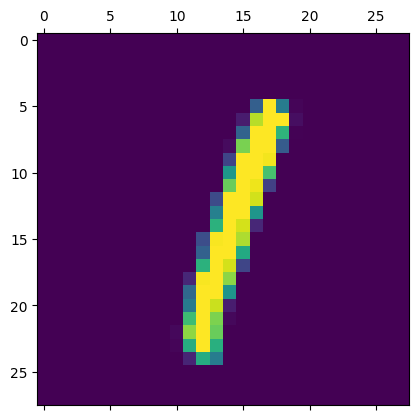

In [11]:
plt.matshow(test_img[5])

In [12]:
y_pred = model.predict(x=test_flattened)
# our output gives a numpy array of 10 neurons with prob we pick the highest one out of it as answer
print(np.argmax(y_pred[5]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
1


# Image recognition using convolutional neural network

In [64]:

CNN = tf.keras.Sequential([
    # tf.keras.layers.Input(),
    tf.keras.layers.Conv2D(input_shape=(28,28,1),filters=32,kernel_size=3,strides=(1,1),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(strides=(1,1),filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

CNN.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(train_img.shape)

(60000, 28, 28, 1)


In [65]:
hist = CNN.fit(x=train_img,y=train_labels,validation_data=(test_img, test_labels),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6650 - loss: 1.1584 - val_accuracy: 0.9431 - val_loss: 0.1954
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9439 - loss: 0.1892 - val_accuracy: 0.9644 - val_loss: 0.1222
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1290 - val_accuracy: 0.9721 - val_loss: 0.0932
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.0988 - val_accuracy: 0.9746 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9732 - loss: 0.0891 - val_accuracy: 0.9738 - val_loss: 0.0823
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9763 - loss: 0.0787 - val_accuracy: 0.9793 - val_loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9804 - val_loss: 0.0591
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0684 - 

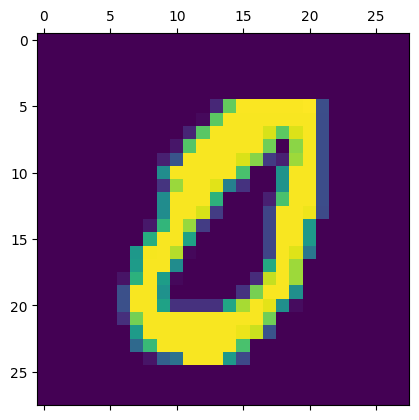

In [66]:
# Time to predict shit with model

plt.matshow(train_img[81])

In [67]:
single_image = train_img[81]

# Expand dimensions to create a batch of one image
single_image_batch = np.expand_dims(single_image, axis=0)

# Get the model's prediction
prediction = CNN.predict(single_image_batch)

# Decode the prediction
predicted_class = np.argmax(prediction, axis=1)

print(f"Predicted class: {predicted_class[0]}")
single_image_batch.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 0


(1, 28, 28, 1)